In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# pm1 y pm2 en minutos (puede tener decimales)
pm1 = 1103
pm2 = 1144

In [3]:
the_path = os.getcwd()
data_path = os.path.join(the_path, '../data/processed-data/')
file_name = 'processed.csv'
file_path = data_path + file_name
df = pd.read_csv(file_path, index_col='Date')

In [4]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.head(5)

,Average
Date,
2011-09-13 13:53:00,5.9
2011-09-13 13:54:00,5.9
2011-09-13 13:55:00,5.9
2011-09-13 13:56:00,5.9
2011-09-13 13:57:00,5.9


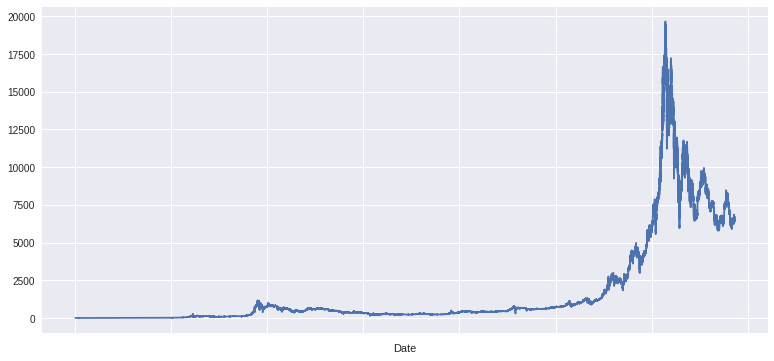

In [5]:
df['Average'].plot(figsize=(13,6))

In [6]:
# getting just last 6 months
df.index = pd.to_datetime(df.index)
df_M = df.last('2Y').copy()
df_M.head(5)

,Average
Date,
2016-12-31 00:01:00,959.1750
2016-12-31 00:02:00,959.1750
2016-12-31 00:03:00,959.1125
2016-12-31 00:04:00,958.9600
2016-12-31 00:05:00,959.0350


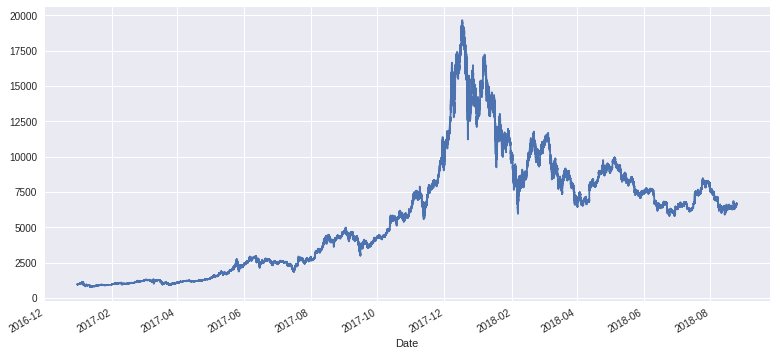

In [7]:
df_M['Average'].plot(figsize=(13,6))

In [8]:
df_M['PM1'] = df_M['Average'].rolling(pm1).mean()
df_M['PM2'] = df_M['Average'].rolling(pm2).mean()
df_M.dropna(inplace = True)
df_M.head()

,Average,PM1,PM2
Date,,,
2016-12-31 19:04:00,963.170,954.159121,954.329397
2016-12-31 19:05:00,962.870,954.164198,954.332627
2016-12-31 19:06:00,963.005,954.170544,954.335975
2016-12-31 19:07:00,962.860,954.175970,954.339250
2016-12-31 19:08:00,962.870,954.181822,954.342668


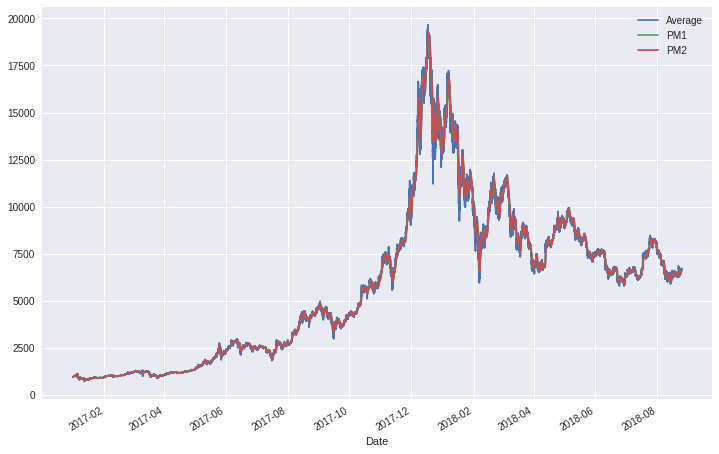

In [9]:
df_M.plot(figsize=(12,8))

In [10]:
df_M['Posicion'] = np.where(df_M['PM1'] > df_M['PM2'], 1, -1)

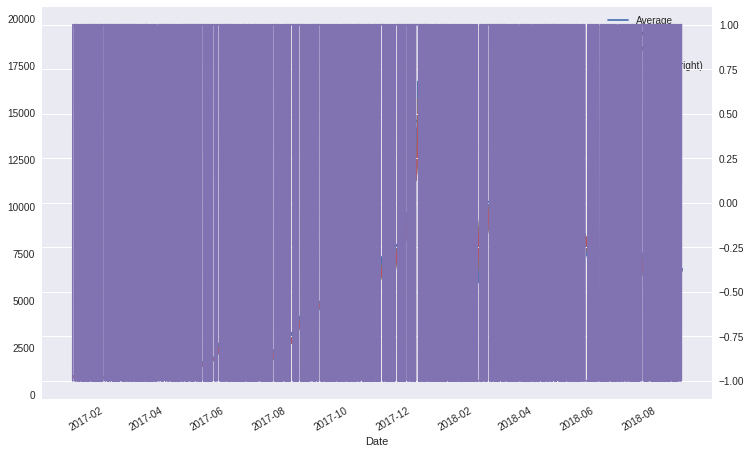

In [11]:
df_M.plot(figsize=(12,8), secondary_y = 'Posicion')

In [12]:
df_M['Retornos'] = np.log(df_M['Average']/df_M['Average'].shift(1))

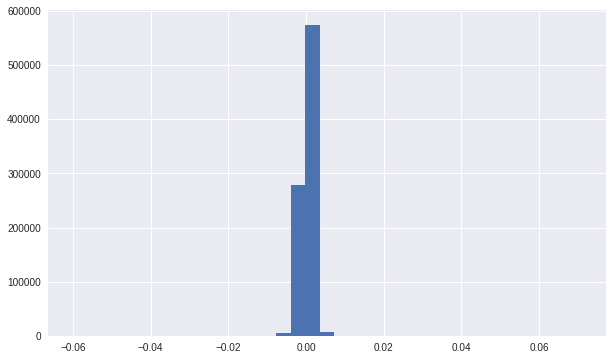

In [13]:
df_M['Retornos'].hist(bins=35, figsize=(10,6));

In [14]:
df_M.dropna(inplace = True)
df_M['Estrategia'] = df_M['Retornos']* df_M['Posicion'].shift(1)
df_M.dropna(inplace = True)
df_M.head()

,Average,PM1,PM2,Posicion,Retornos,Estrategia
Date,,,,,,
2016-12-31 19:06:00,963.005,954.170544,954.335975,-1,0.000140,-0.000140
2016-12-31 19:07:00,962.860,954.175970,954.339250,-1,-0.000151,0.000151
2016-12-31 19:08:00,962.870,954.181822,954.342668,-1,0.000010,-0.000010
2016-12-31 19:09:00,962.870,954.188529,954.346021,-1,0.000000,-0.000000
2016-12-31 19:10:00,963.015,954.195088,954.349500,-1,0.000151,-0.000151


In [15]:
df_M['Retacum'] = df_M['Retornos'].cumsum().apply(np.exp)
df_M['Estracum'] = df_M['Estrategia'].cumsum().apply(np.exp)
df_M.tail()

,Average,PM1,PM2,Posicion,Retornos,Estrategia,Retacum,Estracum
Date,,,,,,,,
2018-08-24 23:56:00,6688.5050,6567.093921,6564.807419,1,-0.000935,-0.000935,6.946426,190.662504
2018-08-24 23:57:00,6688.9700,6567.261378,6564.973916,1,0.000070,0.000070,6.946909,190.675759
2018-08-24 23:58:00,6688.9700,6567.429499,6565.139690,1,0.000000,0.000000,6.946909,190.675759
2018-08-24 23:59:00,6691.7275,6567.599257,6565.307764,1,0.000412,0.000412,6.949773,190.754364
2018-08-25 00:00:00,6694.6475,6567.772493,6565.475326,1,0.000436,0.000436,6.952805,190.837602


([], <a list of 0 Text xticklabel objects>)

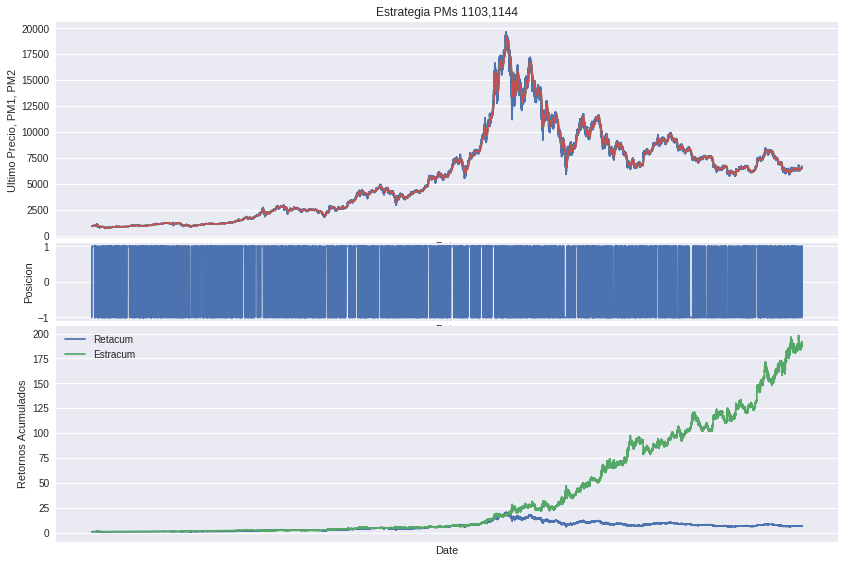

In [16]:
fig = plt.figure(figsize=(14,14))

ax1 = plt.subplot2grid((25,1),(0,0),rowspan = 8, colspan = 1)
df_M['Average'].plot(title = ('Estrategia PMs ' + str(pm1) + ',' + str(pm2)))
df_M['PM1'].plot(ax=ax1)
df_M['PM2'].plot(ax=ax1)

ax1.set_ylabel('Ultimo Precio, PM1, PM2')
plt.xticks([],[])

ax2 = plt.subplot2grid((25,1),(8,0), rowspan = 3, colspan = 1)
df_M['Posicion'].plot(ylim=[-1.1,1.1])
ax2.set_ylabel('Posicion')
plt.xticks([],[])

ax3=plt.subplot2grid((25,1),(11,0),rowspan = 8, colspan = 1)
df_M[['Retacum', 'Estracum']].plot(ax = ax3)
ax3.set_ylabel('Retornos Acumulados')
plt.xticks([],[])